## Random forest

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np

housing = pd.read_csv('housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]


### Concepto total de variables

Árbol normal

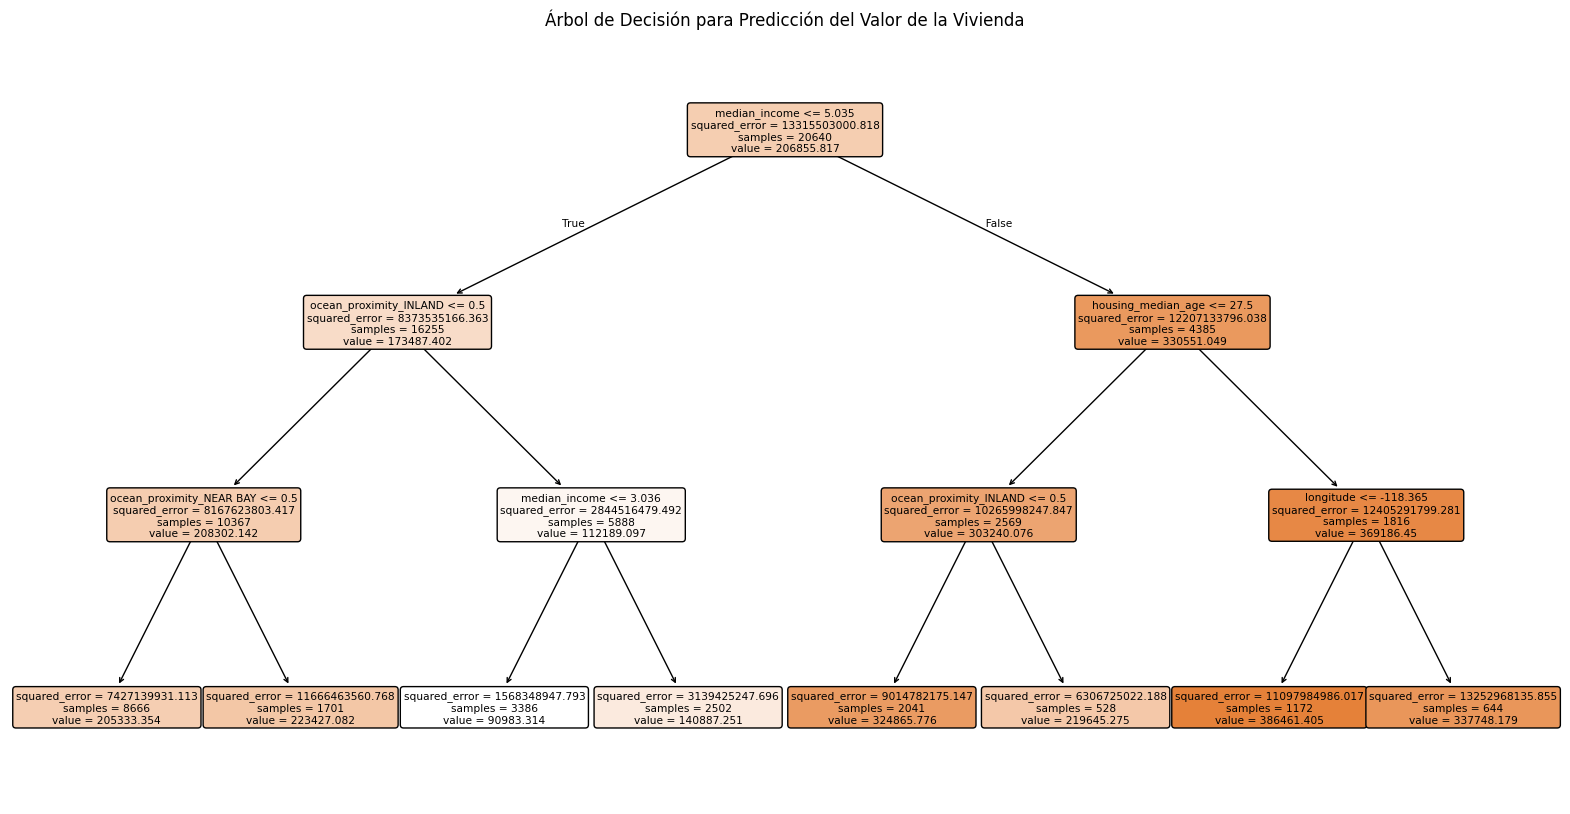

In [10]:
# Train model    
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 3 features

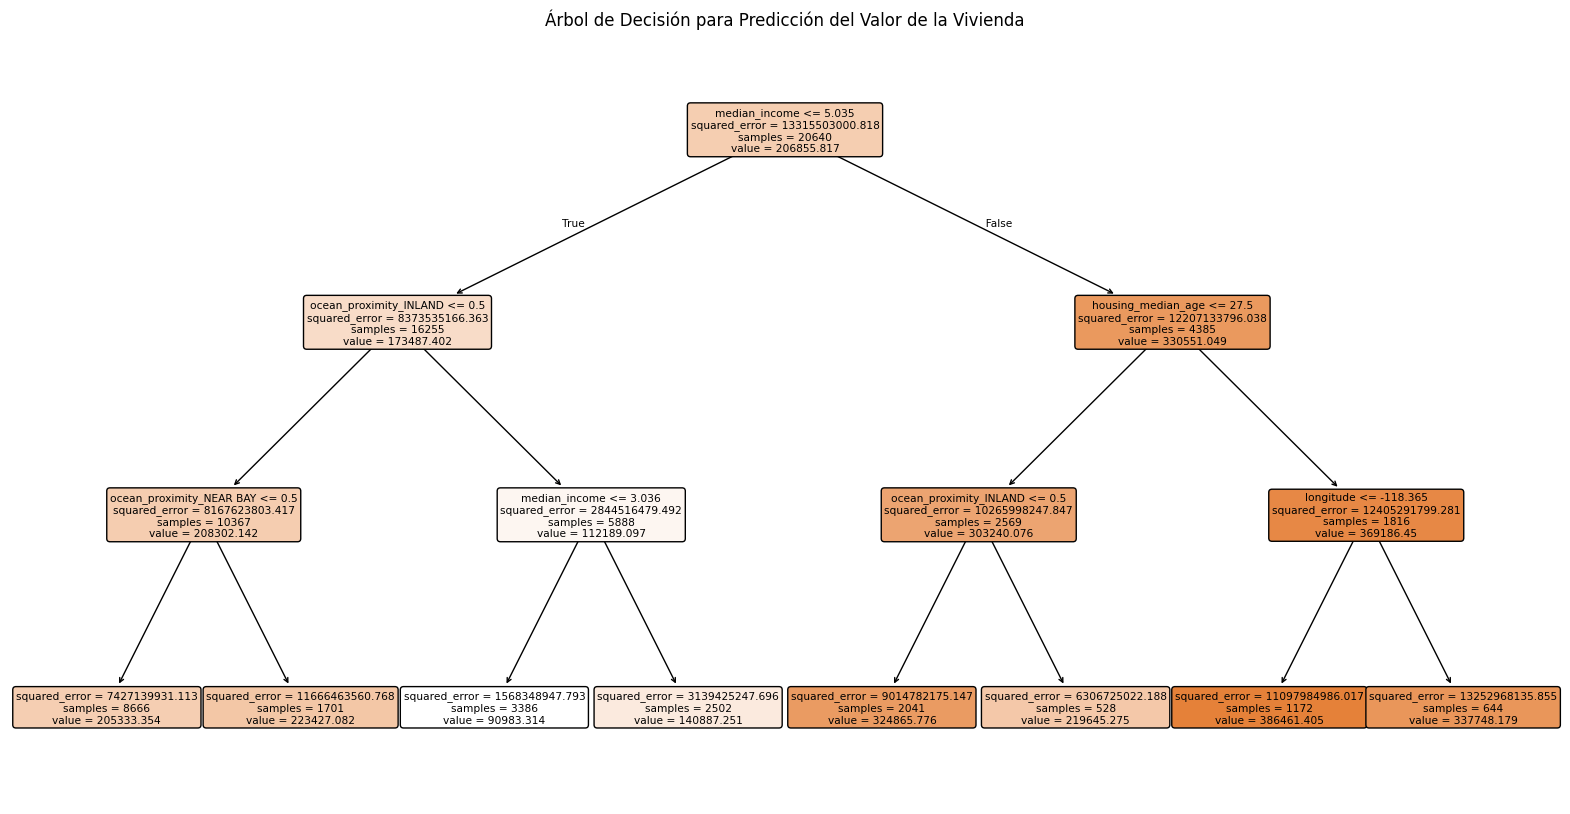

In [11]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 2 features


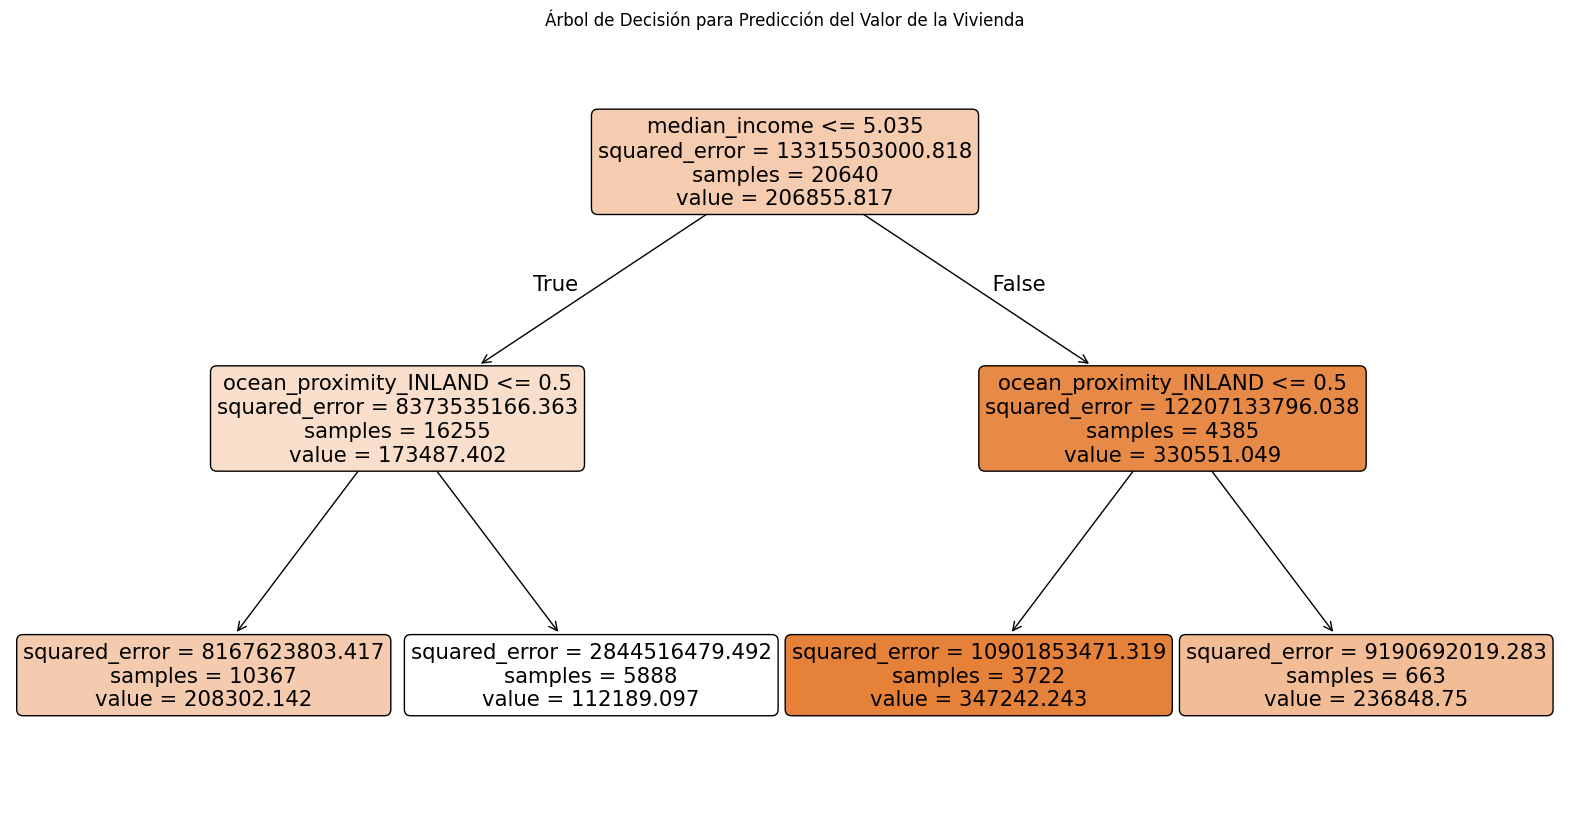

In [12]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(max_depth=2, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()
plt.show()

In [13]:
# Random int


### Bootstrap tree

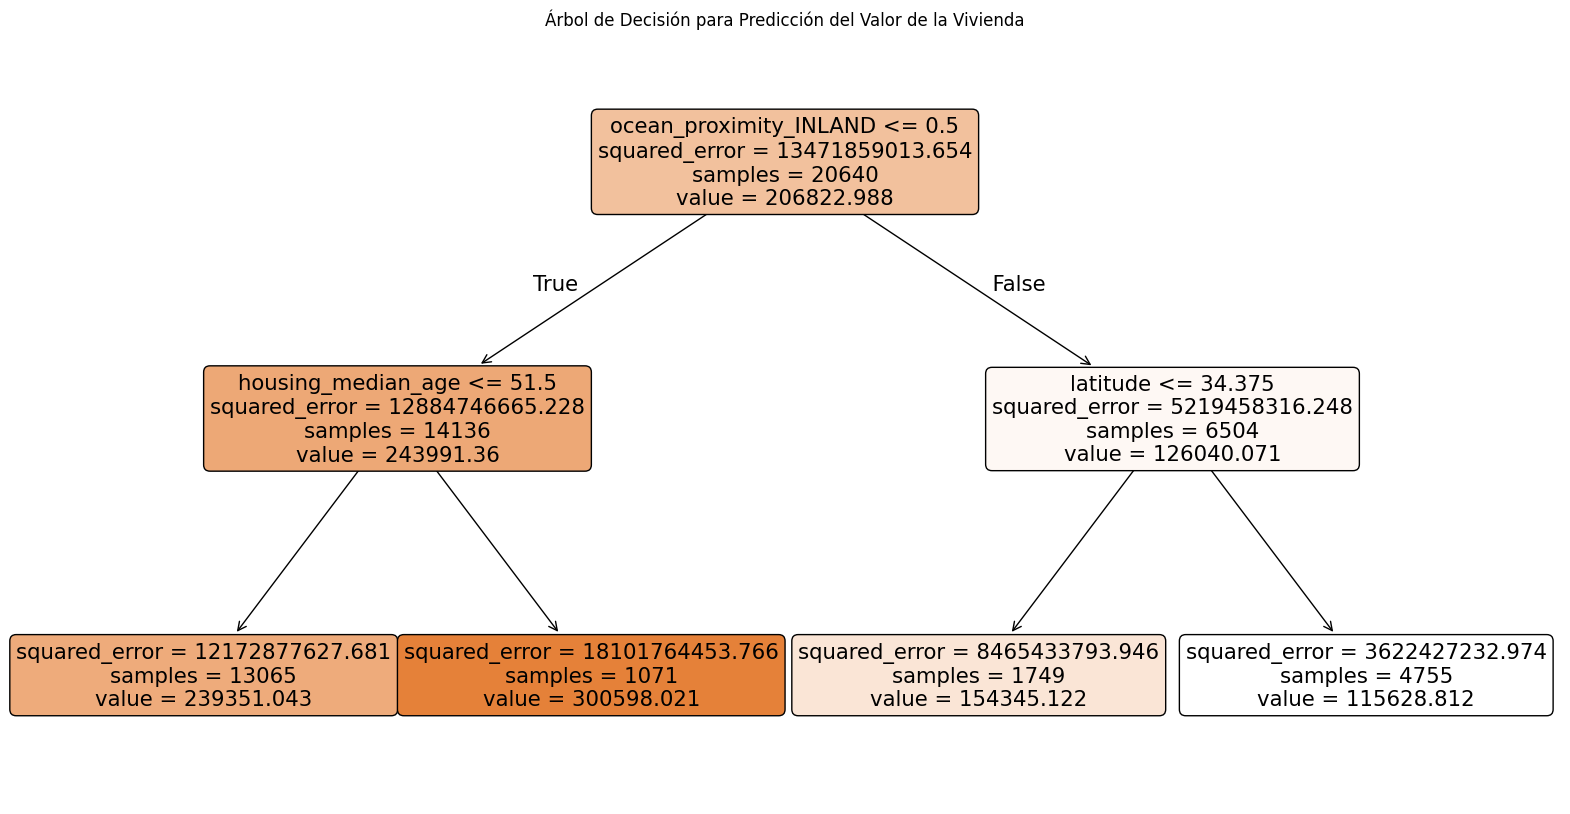

In [24]:
# Crea un bootrap tree, cambia el random_state
# Crear y entrenar el modelo de árbol de decisión

bootstrap_housing= housing.sample(len(housing), replace=True)
X= bootstrap_housing.drop(target, axis=1)
y = bootstrap_housing[target]

model = DecisionTreeRegressor(max_depth=2, random_state=3, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()
plt.show()

### Crea un bosque 

In [47]:
import random
import warnings 

random_states= np.linspace(1,100,100)
warnings.filterwarnings('ignore')   

In [48]:
# X train y test
# Dividir en entrenamiento y prueba
test_bootstrap= housing.sample(300)
X_sample= test_bootstrap.drop(target, axis=1)
y_sample = test_bootstrap[target]

df_predicciones= pd.DataFrame()

for i in range(300):    
    bootstrap_housing= housing.sample(len(housing), replace=True)
    X= bootstrap_housing.drop(target, axis=1)
    y = bootstrap_housing[target]

    model = DecisionTreeRegressor(max_depth=8, random_state=3, 
                                    max_features=len(X_sample.keys()))
    model.fit(X, y)

    predicciones= model.predict(X_sample)
    df_predicciones['predicciones_'+str(i)]= predicciones

    

In [49]:
predicciones_rf=df_predicciones.mean(axis=1)

In [50]:
from sklearn.metrics import r2_score


r2_score(y_true=y_sample, y_pred=predicciones_rf)

0.779829769851382

### Usando Sklearn

In [16]:
from sklearn.ensemble import RandomForestRegressor

housing = pd.read_csv('housing.csv')
housing = housing.fillna(-1)
housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [51]:
# Grid search 

pipeline= Pipeline([
    ('rf', RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42))
])

params= {
    'rf__max_depth': [8,10,15],
    'rf__max_features': ['log2', 'sqrt',10,12]
}

rf_grid= GridSearchCV(estimator= pipeline, param_grid=params, cv=5, n_jobs=-1, scoring='r2')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_estimators=300,
                                                              n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [8, 10, 15],
                         'rf__max_features': ['log2', 'sqrt', 10, 12]},
             scoring='r2')

In [52]:
rf_grid.best_params_

{'rf__max_depth': 15, 'rf__max_features': 10}

In [53]:
best_model= rf_grid.best_estimator_.named_steps['rf']

In [54]:
predicciones_rf= best_model.predict(X_test)

r2_score(y_pred= predicciones_rf, y_true=y_test)

0.8127826344390923

In [56]:
# Comparar con regresion lineal 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
predicciones = model.predict(X_test)
r2_score(y_true=y_test, y_pred=predicciones)

0.6146061359095134

# Interpretacion del modelo

In [57]:
model_interpretability= pd.DataFrame({
    'variables': X_train.keys(),
    'importancia': best_model.feature_importances_
})
model_interpretability

,variables,importancia
0,longitude,0.105713
1,latitude,0.099446
2,housing_median_age,0.048321
3,total_rooms,0.021768
4,total_bedrooms,0.022484
5,population,0.030243
6,households,0.017518
7,median_income,0.484657
8,ocean_proximity_INLAND,0.159482
9,ocean_proximity_ISLAND,0.000343


## Partial dependence plot


Un Partial Dependence Plot (PDP) muestra la relación entre una o más características y la predicción de un modelo, manteniendo las demás variables fijas. Es útil para entender cómo un modelo como un Random Forest toma decisiones.

fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(best_forest, X_train, [7], ax=ax, feature_names=X_train.keys())


In [20]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay


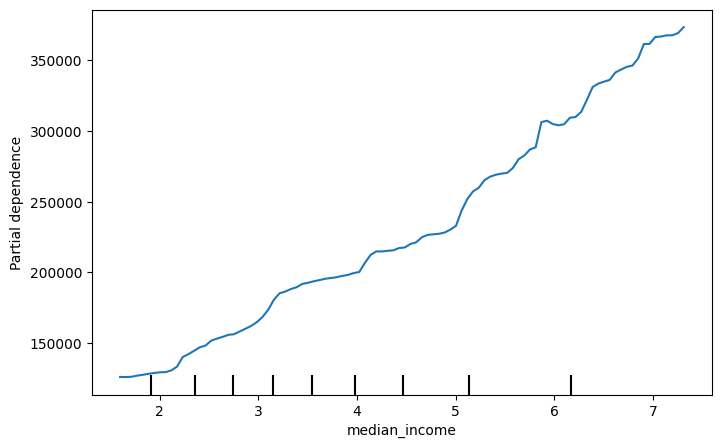

In [59]:
fif, ax= plt.subplots(figsize=(8,5))

PartialDependenceDisplay.from_estimator(
    best_model, X_train, [7], feature_names=X_train.keys(), ax=ax
)

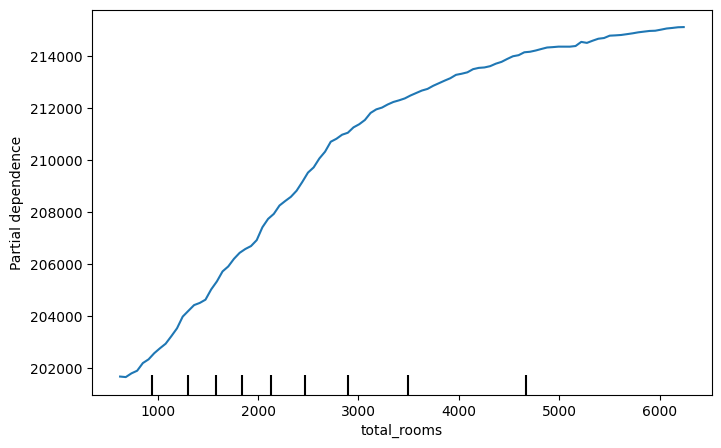

In [60]:
fif, ax= plt.subplots(figsize=(8,5))

PartialDependenceDisplay.from_estimator(
    best_model, X_train, [3], feature_names=X_train.keys(), ax=ax
)

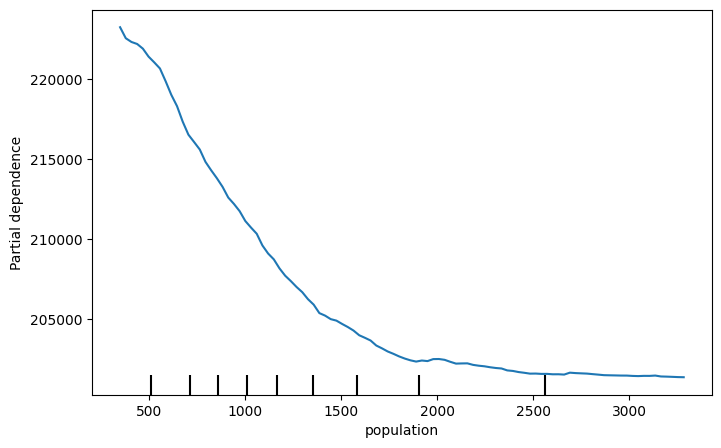

In [61]:
fif, ax= plt.subplots(figsize=(8,5))

PartialDependenceDisplay.from_estimator(
    best_model, X_train, [5], feature_names=X_train.keys(), ax=ax
)

cómo se saca el partial dependence plot

### Partial dependence 3D
PartialDependenceDisplay.from_estimator(best_forest, X_train, [(0, 1)], ax=ax, feature_names=X_train.keys())

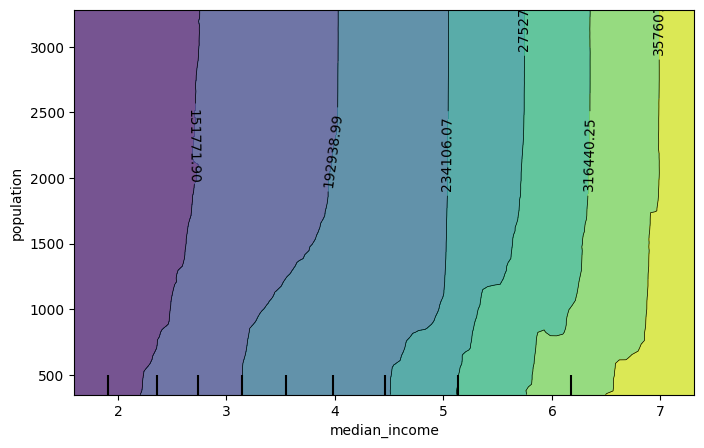

In [65]:
fif, ax= plt.subplots(figsize=(8,5))

PartialDependenceDisplay.from_estimator(
    best_model, X_train, [(7,5)], feature_names=X_train.keys(), ax=ax
)